In [35]:
from __future__ import division
import jedi.jedi as jedi
from jedi.utils import plot, init_tools
import cPickle
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [36]:
noiseless = cPickle.load(open("../data/randompickles/noiseless_errors_ff.p", "rb"))
noise = cPickle.load(open("../data/randompickles/noise_errors_ff.p", "rb"))

In [37]:
noise.keys()

[0.5, 0.1, 0.3, 0.2, 0.4]

In [38]:
noise[.3].keys()

['dforce', 'force']

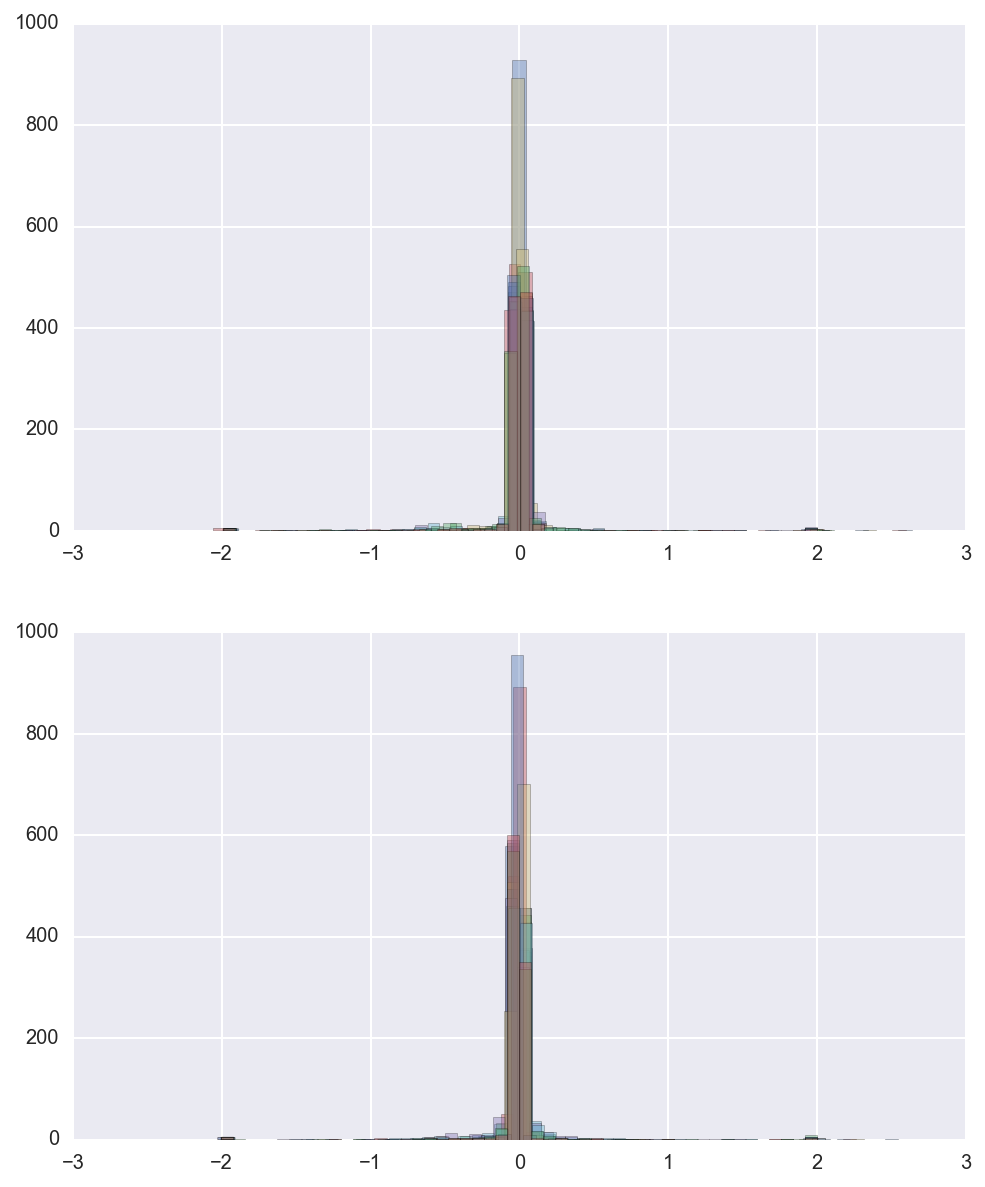

In [39]:
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
for errors in noiseless['force'][0]:
    sns.distplot(errors, kde=False)
plt.subplot(2,1,2)
for errors in noiseless['dforce'][0]:
    sns.distplot(errors, kde=False)

In [41]:
print "Noiseless --"
print"FORCE: %.4f"% (np.var(noiseless['force'][0]))
print"DFORCE: %.4f"% (np.var(noiseless['dforce'][0]))

Noiseless --
FORCE: 0.0581
DFORCE: 0.0496


In [44]:
level = .3

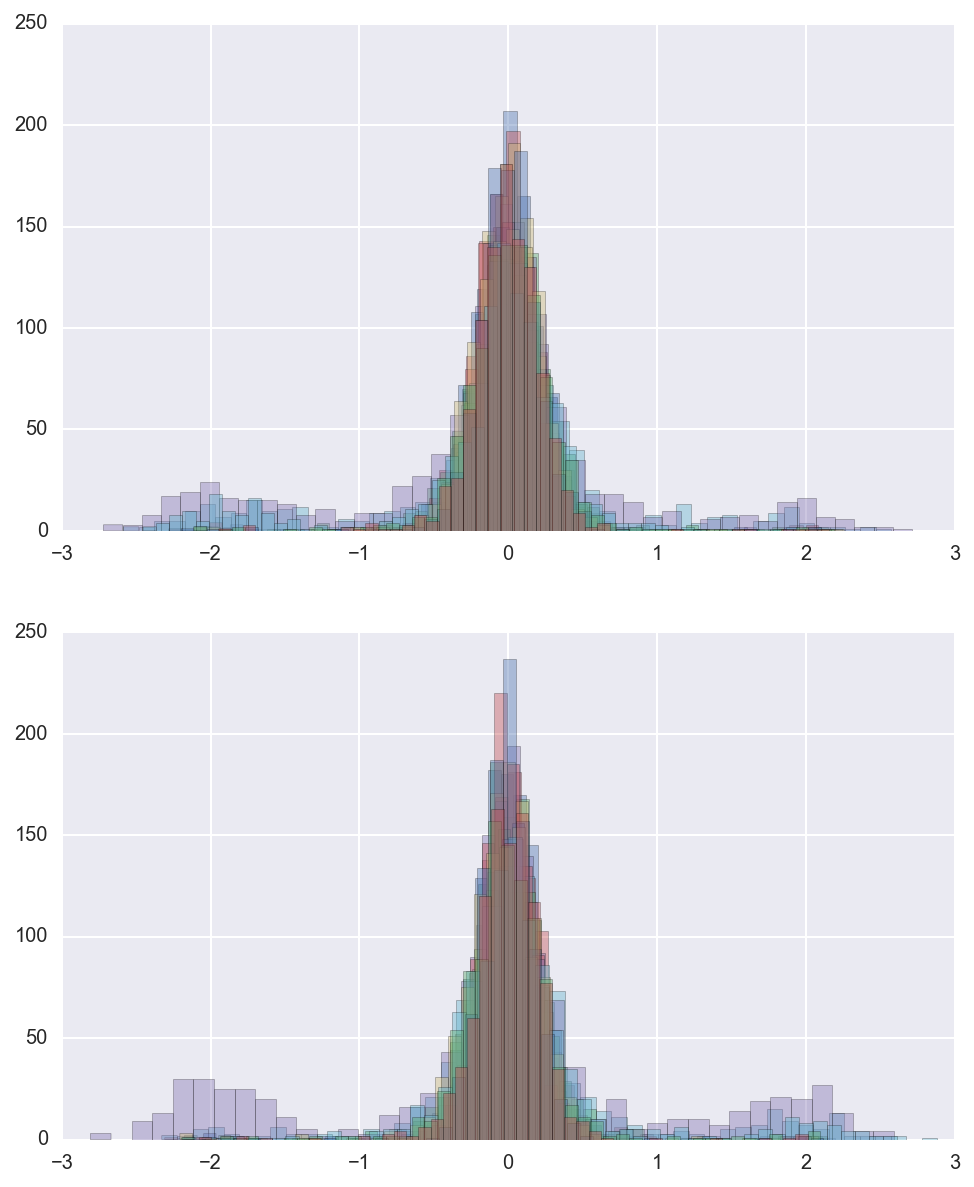

In [45]:
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
for errors in noise[level]['force'][0]:
    sns.distplot(errors, kde=False)
plt.subplot(2,1,2)
for errors in noise[level]['dforce'][0]:
    sns.distplot(errors, kde=False)

In [43]:
print "Gaussian Noise --\n"
for level in sorted(noise.keys()):
    print "Variance: %.2f" % level
    print"FORCE: %.4f"% (np.var(noise[level]['force'][0]))
    print"DFORCE: %.4f\n"% (np.var(noise[level]['dforce'][0]))

Gaussian Noise --

Variance: 0.10
FORCE: 0.0763
DFORCE: 0.0614

Variance: 0.20
FORCE: 0.1982
DFORCE: 0.2012

Variance: 0.30
FORCE: 0.2089
DFORCE: 0.2117

Variance: 0.40
FORCE: 0.3597
DFORCE: 0.3522

Variance: 0.50
FORCE: 0.2974
DFORCE: 0.3445

